In [1]:
import numpy as np      # Mathematical operations
import matplotlib.pyplot as plt         # Nice graphs
from mpl_toolkits.mplot3d import Axes3D        # 3D graphs

## Generate random input data to train on

In [2]:
# creating fake data with a linear relationship
observations = 1000
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

inputs = np.column_stack((xs,zs))
print(inputs.shape)

(1000, 2)


## Create the targets we will aim at

In [3]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs +5 + noise

print(targets.shape)

(1000, 1)


## Plot the training data
##### the point here is to see that there is a strong trend that our model should learn to reproduce

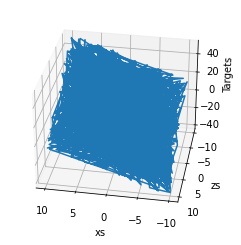

In [4]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

### Initialize variables

In [5]:
# this will be the radius of the range we will use to initialize the weights and the biases
# the weights will be picked randomly from the range -0.1 to 0.1
init_range = 0.1

weights = np.random.uniform(-init_range, init_range, size=(2,1))

biases = np.random.uniform(-init_range, init_range, size=1)
# in machine learning, there are as many biases as there are outputs!
print(weights)
print(biases)

[[-0.07463841]
 [-0.09981117]]
[0.04483748]


### Set a learning rate

In [6]:
learning_rate = 0.02
# Change this rate to optimize algorithm to reach minimum fast but not too fast that it oscillates forever

### Train the model

In [9]:
# Plan for each iteration - calculate outputs, compare the outputs to targets through the loss, print the loss,
# adjust the weights and biases, recalculate outputs etc...

for i in range(100):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets
    loss = np.sum(deltas ** 2) / 2 / observations
    print(loss)
    deltas_scaled = deltas / observations
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

0.3879860409682994
0.3794077184333668
0.3711689672985372
0.36325634568921483
0.35565694382506147
0.3483583629571406
0.3413486951388276
0.33461650379748736
0.3281508050752151
0.3219410499082044
0.3159771068154981
0.3102492453690437
0.3047481203180861
0.29946475634198755
0.2943905334066134
0.28951717270037397
0.28483672312699115
0.28034154833294683
0.27602431424844187
0.27187797712155115
0.2678957720260387
0.2640712018240944
0.2603980265659726
0.2568702533092496
0.2534821263410823
0.2502281177875147
0.24710291859451688
0.2441014298660353
0.24121875454492786
0.23845018942320315
0.23579121746853832
0.2332375004545456
0.2307848718827719
0.22842933018487854
0.2261670321939104
0.22399428687400527
0.22190754929831163
0.21990341486528867
0.21797861374395328
0.21613000553901046
0.21435457416716505
0.2126494229362531
0.21101176981916364
0.20943894291484338
0.20792837608897669
0.20647760478722513
0.20508426201420538
0.20374607447163195
0.20246085884933598
0.20122651826309995
0.20004103883350222
0.

### Print weights and biases and see if we have worked correctly

In [10]:
print(weights, biases)

[[ 2.00214263]
 [-3.00088434]] [4.92380588]


### Plot last outputs vs targets
##### As they are the last ones at the end of the training, they represent the final accuracy of the model
##### The closer this is to a 45 degree line, the closer target and output values are (more accurate model)

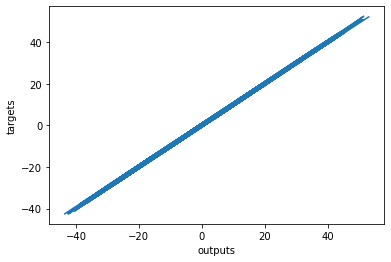

In [11]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()